In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np
import DQN.agent as agent



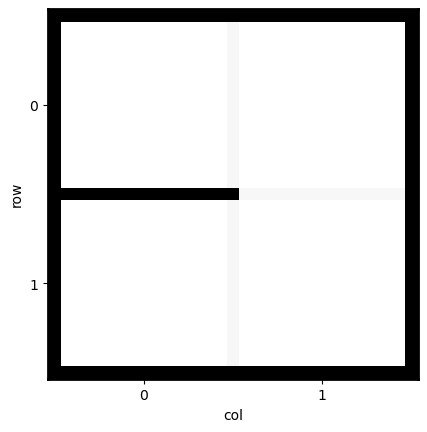

In [2]:
maze_1 = LatticeMazeGenerators.gen_dfs(
    grid_shape=(2, 2),
    lattice_dim=2,
    accessible_cells=None,
    max_tree_depth=None,
    start_coord=None,
    do_forks=True,
)

MazePlot(maze_1).plot()

plt.show()

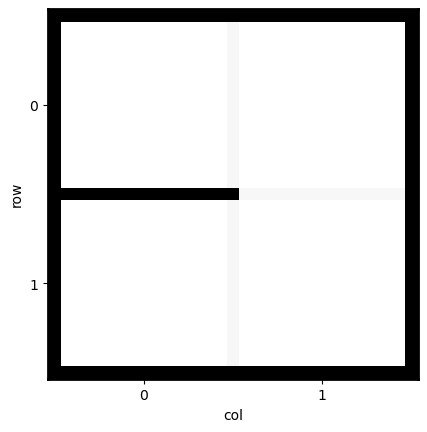

In [3]:
maze_2 = LatticeMazeGenerators.gen_dfs(
    grid_shape=(2, 2),
    lattice_dim=2,
    accessible_cells=None,
    max_tree_depth=None,
    start_coord=None,
)

MazePlot(maze_2).plot()

plt.show()

In [4]:
mult_agent = agent.CNN_Maze_Agents(3)
mult_agent.run_agent(1,maze_1,epsilon=1,sample_prob=True)

tensor([[0.2124, 0.1352, 0.1621, 0.2322, 0.2580]])
tensor([[0.2392, 0.1557, 0.1697, 0.2034, 0.2319]])


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


[[0.21312356 0.29620212 0.16586354 0.11988398 0.20492679]]
[[0.27152473 0.21332957 0.14300525 0.16231441 0.209826  ]]
[[0.27152473 0.21332957 0.14300525 0.16231441 0.209826  ]]
cumulative reward: [100]


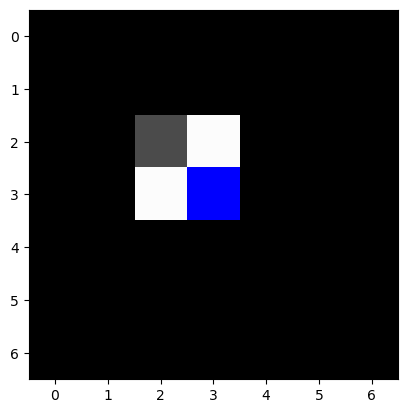

In [5]:
mult_agent.animate_last_replay(0)

In [6]:
import gymnasium as gym
num_agents = 2
spatial = []
env = gym.make('Maze_env/MazeRunner-v0',num_agents=num_agents,vision_len=7,maze=maze_1,render_mode='human',
               obs_type = 'basic')
observations, info = env.reset()




episode_over_1 = False
episode_over_2 = False
i=0
while not episode_over_1 and i <100:
    action = []
    for a in range(num_agents):
        action.append(env.action_space.sample())
    observations, reward,terminated, truncated,info = env.step(action)
    
    episode_over = terminated or truncated
    i+=1
env.reset(options = {'new_maze': maze_2})
while not episode_over_2:
    action = []
    for a in range(num_agents):
        action.append(env.action_space.sample())
    observations, reward,terminated, truncated,info = env.step(action)
    
    episode_over = terminated or truncated

env.close()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


KeyboardInterrupt: 